In [9]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float
    target_currency: str

In [10]:
my_obj : PortfolioState = {
    "amount_usd": 1000.0,
    "total_usd": 1500.0,
    "total_inr": 120000.0
}

In [11]:
def calculate_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

In [12]:
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [13]:
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 0.9
    return state

In [14]:
def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [15]:
from langgraph.graph import StateGraph , START , END

builder = StateGraph(PortfolioState)
builder.add_node("calc_total_node", calculate_total)
builder.add_node("convert_inr_node", convert_to_inr)
builder.add_node("convert_eur_node", convert_to_eur)

builder.add_edge(START,"calc_total_node")
builder.add_conditional_edges("calc_total_node",choose_conversion,{
    "INR":"convert_inr_node",
    "EUR":"convert_eur_node"
})
builder.add_edge(["convert_inr_node","convert_eur_node"],END)
graph = builder.compile()

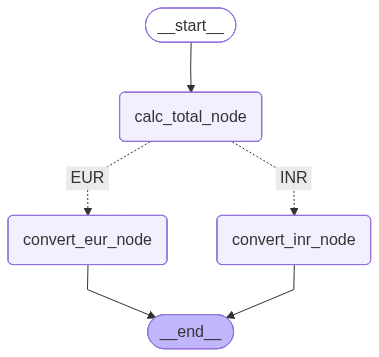

In [17]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({
    "amount_usd": 2000.0,
    "total_usd": 0.0,
    "total_inr": 0.0,
    "target_currency": "INR"})

{'amount_usd': 2000.0,
 'total_usd': 2160.0,
 'total_inr': 183600.0,
 'target_currency': 'INR'}